# Evaluate your evaluation methods! A key to meaningful inference.

<div class="alert alert-block alert-danger">
<b>Alert:</b> If you're running this on <b>Google Colab</b>, then uncomment and run the next two cells.
</div>

In [1]:
# !git clone https://github.com/Mark-Kramer/METER-Units.git

In [2]:
# import sys
# sys.path.insert(0,'/content/METER-Units')

---
# 0 - Setup & Introduction

In [3]:
# Load modules
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
import plotly.graph_objects as go
from IPython.lib.display import YouTubeVideo
import ipywidgets as widgets
from IPython.display import display, clear_output
# Load custom functions
from inference_functions import *

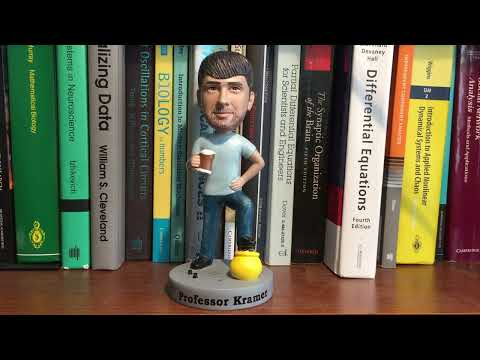

In [4]:
YouTubeVideo('Jj2wmI9byCM')

### What is Inference?

Inference is a fundamental concept in both everyday life and scientific investigation. It is the process of drawing conclusions based on evidence and reasoning. Inference allows us to make predictions, understand relationships, and gain insights from data and observations.

### Why is Inference Important?

- **Decision-Making**: Inference helps us make informed decisions. Whether you're deciding what to wear based on the weather forecast or determining the best strategy for your experiment, inference plays a crucial role in evaluating options and outcomes.

- **Understanding Brain Function**: Inference helps neuroscientists draw conclusions about brain activity from experimental data, bridging the gap between observed neural signals and underlying brain processes.

- **Clinical Applications**: Inference is essential for diagnosing and treating neurological disorders. By analyzing patient data, clinicians can infer the underlying causes of symptoms and tailor treatments accordingly.

### Everyday Examples of Inference

- **Weather Predictions**: Meteorologists use data from satellites, weather stations, and historical patterns to infer future weather conditions. This helps us prepare for what’s coming, whether it's bringing an umbrella or planning for a sunny day.

- **Medical Diagnoses**: Doctors use symptoms, medical history, and test results to infer the most likely cause of a patient's condition. This process is critical in providing accurate diagnoses and effective treatments.

- **Electrophysiology**: Recording electrical activity from neurons allows researchers to infer the roles of specific neurons or networks in processing information.

- **Behavioral Studies**: By observing behavior in response to stimuli, neuroscientists infer the neural mechanisms underlying perception, decision-making, and learning.

### So, What is Inference?

- Here, we focus on **statistical inference** - using data from a sample to make inferences about a population. Techniques such as hypothesis testing and confidence intervals are key tools in this process. We will learn to apply these tools here.

### Inference Skills To Develop

- **Ask Questions**: Cultivate curiosity by asking questions about the world around you. Why did something happen? What might influence this happening? Asking questions leads to deeper understanding and better inference skills.

- **Gather Evidence**: Collect relevant information and data. The more evidence you have, the stronger your inferences will be. Evaluate the quality and reliability of your sources. We can arrive at better conclusions through better data collection [Link to Units on Experimental Design]().

- **Think Critically**: Analyze the evidence and consider multiple perspectives. Avoid jumping to conclusions without thorough examination. Critical thinking helps in making sound inferences.

### What's next?

- In this Mini, we will practice making inferences from from noisy data.
- To do so, we will use data from a specific example. We will use these data to make inferences about a population (i.e., statistical inference).
- We will think critically about our inference results, ask questions about the interpretation, and ultimately improve the inferences we make from the data.

---
## 1. The data: swim lessons versus drownings.

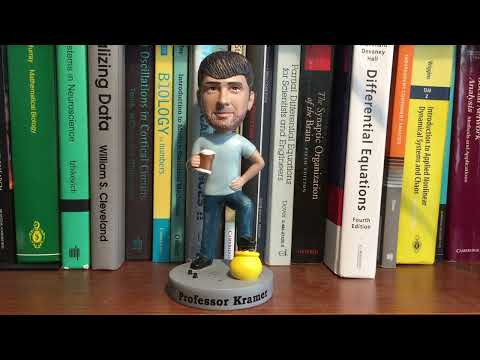

In [5]:
YouTubeVideo('AY9pBDo93dc')

You receive data from a community organization interested in understanding the impact of swimming lessons on swim safety. The data consist of the following information from in `N = 299` communities:

* `swim_lessons` - the number of swim lessons in a community,

* `drownings`   - the number of drownings (per 100,000 individuals) in a community,

* `xy` - the geographic location (latitude and longitude) of the community,

In [6]:
swim_lessons, drownings, xy = load_data()

We're interested in understanding the relationship (if any) between `swim_lessons` and `drownings`.

Let's start by plotting the data.

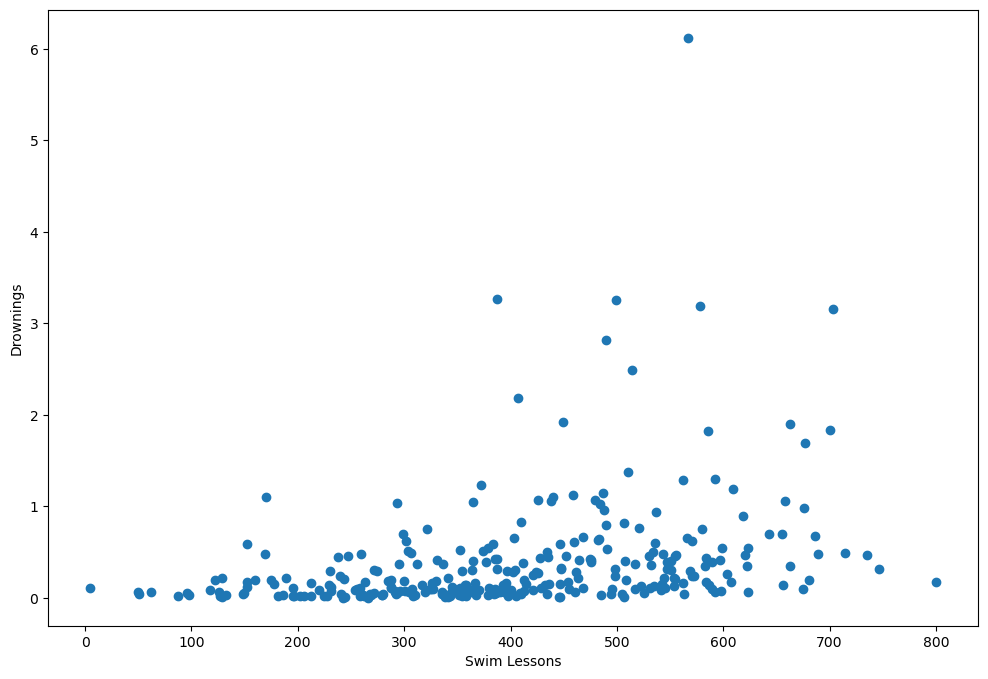

In [7]:
# Plot the data.
plt.figure(figsize=(12, 8))
plt.scatter(swim_lessons, drownings)
plt.xlabel('Swim Lessons')
plt.ylabel('Drownings');

<div class="alert alert-block alert-success">

**Q:** As part of our inference process, let's ask some questions: What do you observe? How might the number of swim lessons influence the number of drownings?

**A:**

- *The drowning values are "squished" near 0, with fewer observations at larger values.*
- *At first glance, the number of drownings appears to increase with the number of swim lessons ... that's confusing.*

</div>

For reference (and maybe for future use ...) let's also plot the geographic location of each community.

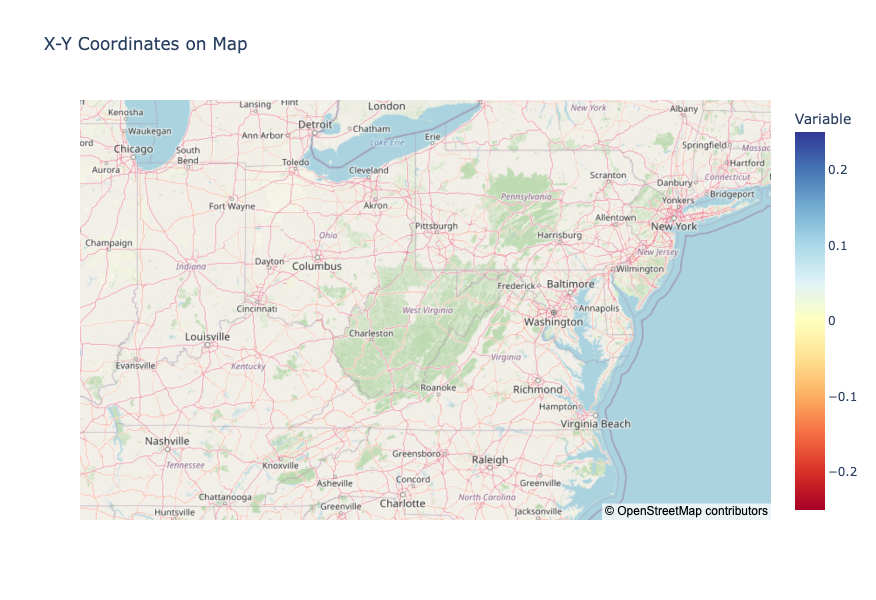

In [8]:
plot_spatial_coordinates(xy, 0)

<div class="alert alert-block alert-success">

**Q:** Now, what do you observe? How might the geographic location of each community influence our inference?

**A:**

- *The communities vary in spatial location, with a high concentration at a point near the ocean.*
    
</div>

<div class="alert alert-block alert-danger">

**Note:**
Data visualization is often essential to inference. For more information check out [Link to Units on Data Visualization](). While we utilize data visulzation here, our focus is inference, and specifically statisitcal inference, as we discuss next.  
</div>

---
## 2. Make an inference: How do the number of swim lessons relate to drownings?

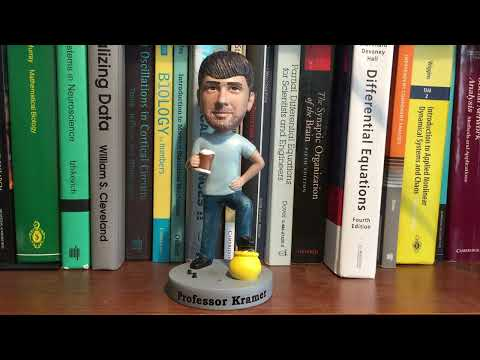

In [9]:
YouTubeVideo('_2s_JpwqdKg')

Now, let's make a **statistical inference** from these data.

In general, our goal is to infer from the noisy data a meaningful feature that's simpler than the data itself.

There are many ways to do so.

Here, we'd like to understand if there's a relationship between `swim_lessons` and `drownings`.

To do so, let's **fit a line** to the data. This is called a **linear regression**, which provides a simple way to identify linear relationships between variables. We do not expect linear relationships will capture all of the complexity in our data. However, these relationships often provide a useful first step, and are simple to compute and interpret.

In linear regression, the slope of the line provides an estimate of the relationship between the number of `drowings` and `swim_lessons`.

In [10]:
create_dropdown_estimate_regression(swim_lessons, drownings)

Dropdown(description='Options:', options=('I want to write all the code myself.', 'Show me the code and I will…

Output()

Let's interpret these numbers:

#### Slope estimate = 0.00138

**Meaning:** The slope estimate represents the change in the number of `drownings` for a one-unit change in the number of `swim_lessons`.

**Interpretation:** For every one-unit increase in the number of `swim_lessons`, the number of `drownings` is estimated to increase by 0.00138, on average.

#### p-value = 4.2e-09

**Meaning:** The p-value is used to test the null hypothesis that the slope of the regression line is zero (no relationship between the number of `swim_lessons` and the number of `drownings`).

**Interpretation:** The p-value describes the probability of seeing an effect at least this large if the number of `swim_lessons` had no relation to the number of `drownings` . A p-value of 4.2e-09 is much smaller than commonly used thresholds to significance levels (e.g., 0.05). This means that there is enough evidence to reject the null hypothesis. In other words, the data provide sufficient evidence to conclude that there *is* a statistically significant relationship between the number of `swim_lessons` and the number of `drownings`.


<div class="alert alert-block alert-success">

**Q:** Think about an increase of 0.00138 `drownings` for a one-unit increase in the number of `swim_lessons`. Is this big or small? How do we intepret these results?

**A:** 

Our linear models consits of fitting this line to the data:

`drownings = slope_estimate * swim_lessons`

or

`drownings = 0.00138 * swim_lessons`

Consider what happens if the number of swim lessons increases by 1. Then, according to our fit model, the number of drownings increases by:

`drownings = 0.00138 * 1 = 0.00138`

That's a small increase, in both the number of swim lessons and number of drownings.

Alternately, consider what happens if the number of swim lessons increases by 1000. Then, plugging into our model, we find the number of drownings increases by:

`drownings = 0.00138 * 1000 = 1.38`

That's perhaps a more interpertable result; a community making a policy decision to promote more swim lessons (e.g., through subsidies) might expect 1 more drowning.

In this way, we can always interpert the results of a model. It's often useful to plug in values, and see what happens.
</div>

---
Let's also **visualize** the estimated line by plotting it with the data.

In [11]:
create_dropdown_plot_regression(swim_lessons, drownings)

Dropdown(description='Options:', options=('I want to write all the code myself.', 'Show me the code and I will…

Output()

<div class="alert alert-block alert-success">

**Q:** Again, interpert the results of your estimation. What do you observe in this plot? How might the number of swim lessons influence the number of drownings?

**A:**

- Nothing looks terribly wrong ... the a line seems to fit the data.
- The slope is positive, so that the number of `drownings` increases with the number of `swim_lessons`. 

</div>

<div class="alert alert-block alert-danger">

**Discussion:**

</p>

We've applied a statistical inference approach and found a significant result, certainly a result passable for peer-reviewed publication.

**Q:** Think critically about this result. What's our next step?

**CENTER generated Button: I'm ready to publish!**
- *Discussion*: That's a reasonable conclusion, based on the evidence we've looked at so far. However, our conclusion is controversial: to reduce drownings, reduce the number of swim lessons. Before we pursue publication and recommend this policy, let's investigate one important aspect of our inference - how well our model (the line) fits the data. A good fit to the data inspires confidence in our inference. Alternatively, a poor fit provides us motivation to continue developing our model.

**CENTER generate Button: I'm not sure yet!**
- *Discussion*: I'm glad you're not sure. Neither am I. Our results suggest a controverisal conclusion: to reduce drownings, reduce the number of swim lessons. To make this conclusion, we fit a line to the data. But, is this line a good model of the data? If so, that inspires confidence in our result. However, if the model (a line) is not a good representation of the data, then we might question the result. Continue on to the next Mini to learn a strategey to answer this question.
</div>

---
## 3. Something’s not right … evaluate your evaluation method.

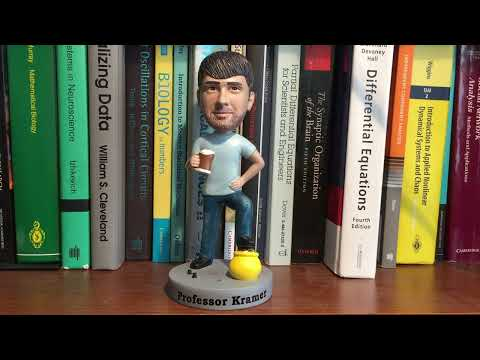

In [12]:
YouTubeVideo('ei83locyWZw')

To look for a relationship between `swim_lessons` and `drownings`, we chose a particular model of the relationship - we fit a line to the data. But, was this a good choice?

An important step in any analysis is to **check our model**. Many approaches exist to do so. 

In fact, we've already completed one model check:

1. **Plot the Data**: We visualized the data (as a scatter plot) in Mini 2. Visual inspection suggests - at first glance - the linear relationship is reasonable.

<div class="alert alert-block alert-success">

**Q:** Look again at the plot in Mini 2. There's something about this linear fit that makes *me* uncomfortable ... what is it?

**A:**

- HINT: Examine the left-hand side of the plot, when the number of `swim_lessons` is small.
- ANSWER: When the number of `swim_lessons` is small, the model estimates **negative values** for the number of `drownings`. That does not make physical sense. If we're interested in large numbers of `swim_lessons`, we can perhaps be comfortable ignoring this oddity. But, maybe it's a sign of bigger problems ...

</div>

A second important model check is:

2. **Residual Analysis**: Residuals are the differences between observed and predicted values. Here, the residuals are the difference between the estimated drownings from the line and the actual values for `drownings`.

If the model is a good fit to the data, then we expect a patternless set of residuals (i.e., the residuals are randomly scattered around zero), indicating that the linear model is appropriate.

Alternatively, if we find patterns in the residuals, we might wonder about our model choice, and consider strategies to improve our model.

<div class="alert alert-block alert-danger">

**NOTE:** Other approaches exist to check our model. These include goodness-of-fit metrics (like R-squared), comparison with alternative models (using techniques like AIC), and cross-validation to assess how well the model generalizes to new data. There's unfortunately no one strategy to check a model.  Here we focus on two visualization techniques because these are intuitive and provide a good gauge of how our model is doing.

</div>

Now, let's plot the residuals:

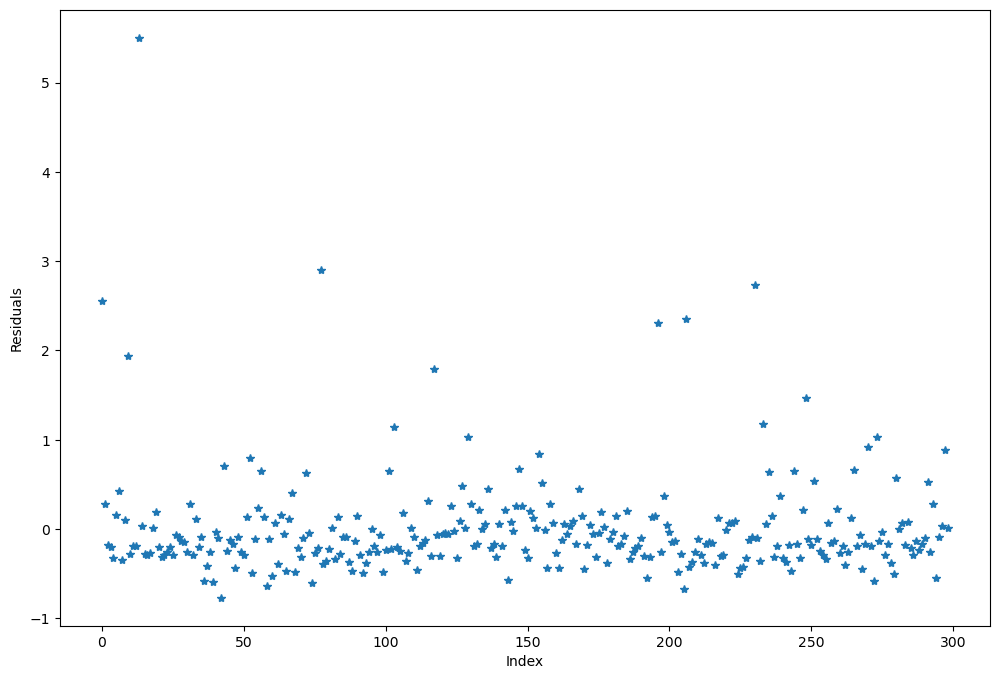

In [13]:
residuals = compute_residuals_2d(swim_lessons, drownings)
plt.figure(figsize=(12, 8))
plt.plot(residuals, '*')
plt.xlabel('Index')
plt.ylabel('Residuals');

<div class="alert alert-block alert-success">

**Q:** What do you see in the residuals ... do you see any patterns?

**A:**

- *At first glance, these residuals look mostly patternless ...*

</div>

<div class="alert alert-block alert-danger">

In the plot above, no systematic patterns are obvious; instead, the residuals appear to fluctuate around 0.

That means our model is all good, right?

NO! This visualization of the residuals is *not* very informative; the horizontal axis (the variable `index`) is arbitrary.

</div>

To observe systematic patterns in the residuals, let's plot the `residuals` versus the predictor in our model: the number of `swim_lessons`.

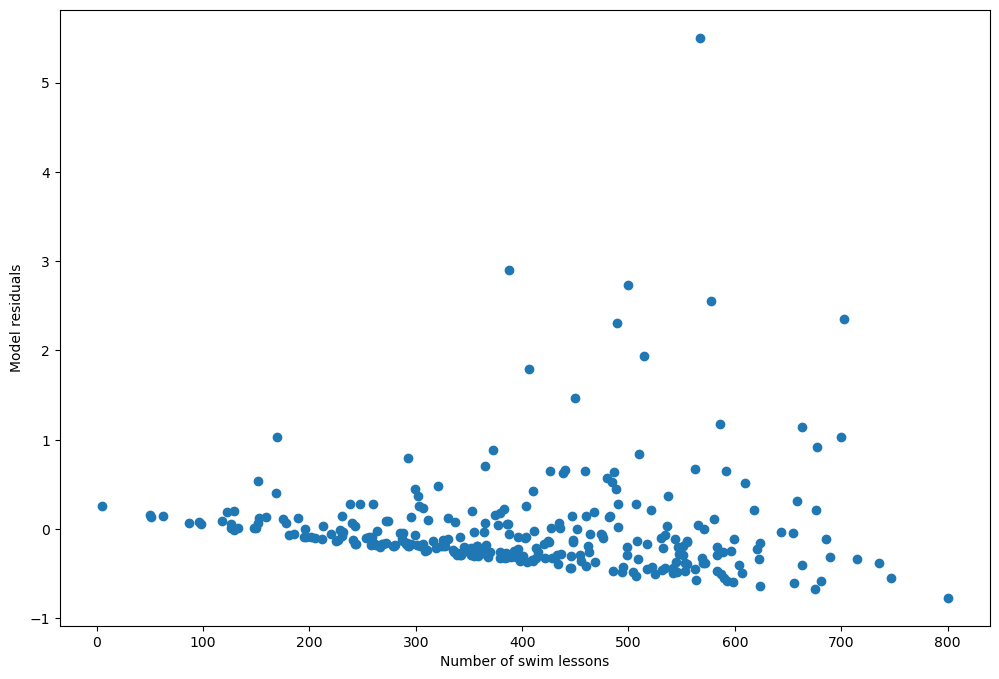

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(swim_lessons, residuals)
plt.xlabel('Number of swim lessons')
plt.ylabel('Model residuals');

<div class="alert alert-block alert-success">

**Q:** Now, do the residuals look patternless? What patterns do you see?

**A:**

*Our inspection of `residuals` versus `swim_lessons` reveals two clear patterns:*

- *as `swim_lessons` increases, a systematic decrease in the `residuals`,*
- *as `swim_lessons` increases, the variability of the `residuals` tends to increase.*
</div>

We conclude from this **model check** that something isn't right ... our model doesn't adequately describe features in the data.

<div class="alert alert-block alert-success">

**Q:** We've plotted the `residuals` versus the predictor `swim_lessons`, but we could also plot
    `residuals` versus the outcome variable `drownings`. Doing so, what do you see?

**A:**

</div>

So far, we've investigated how the `residuals` vary with the predictor `swim_lessons` or outcome `drownings`.

But, we have more information: we also have the geographic location (latitude and longitude) of each community in the study.

Let's investigate how the `residuals` relate to the geographic location of the community.

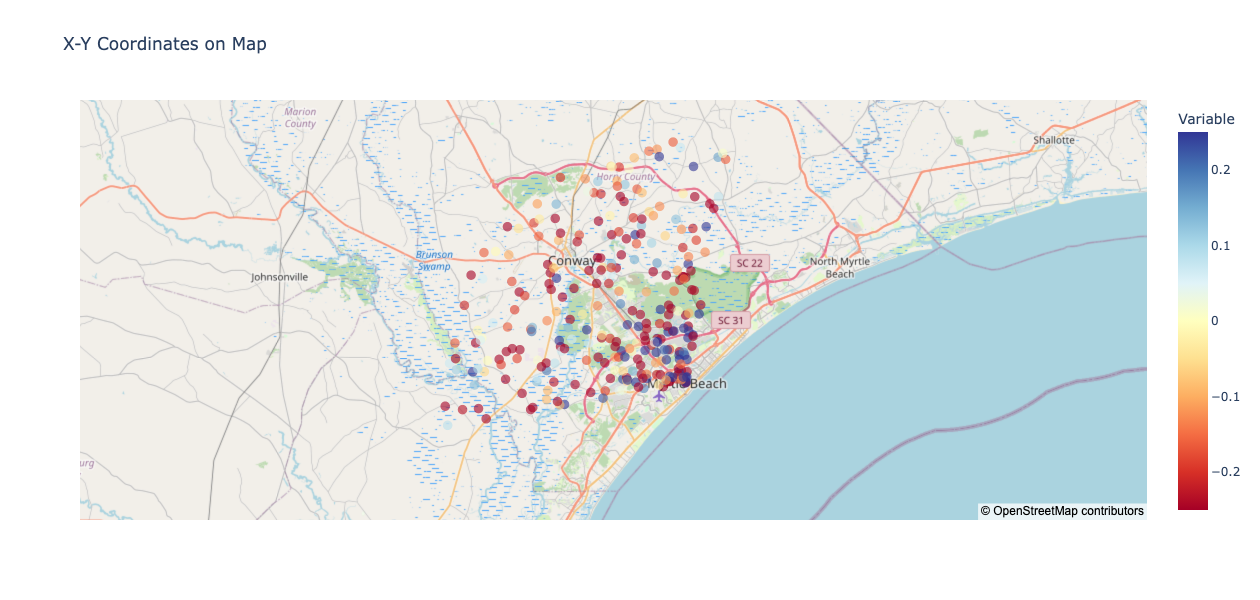

In [15]:
plot_spatial_coordinates(xy, residuals.to_numpy())

<div class="alert alert-block alert-success">

**Q:** Do the residuals look patternless? Do you see any patterns in the residuals that depend on location?

**A:**

- *The residuals appear to vary with geographic location. Nearer to the ocean, the residuals tend to be more positive (darker blue colors).*
    
</div>

Our analysis of the residuals suggests an important result: **our model fit is no good**.

This is a very useful result.

Our initial statistical inference produced a counter-intuitive result: more swim lessons correlate (significantly, p<<0.05) with more drownings.

But this initial inference is based on a model - the line - that's not a good representation of the data; clear trends exist in the residuals. 

Our next step is to improve the model, and thereby improve the statistical inferences we make from the data.

<div class="alert alert-block alert-danger">

**NOTE**: In this case, our two model checks produced different results.

Our first model check (**Plot the Data**) was acceptable; the model (i.e., line) appeared consistent with the data.

Our second model check (**Residual Analysis**) failed; the resiudals were not randomly scattered around 0.

Because the model check failed, we can dismiss the counter-intuitve relationship identified in our initial model (i.e., that more `swim_lessons` increase the number of `drownings`), and continue model development.

However, we emphasize that further model development should be purseued regardless of the relationship our initial model identified. Even if the initial  statistcal inference proposed an intuitive result (i.e., that more `swim_lessons` decrease the number of `drownings`), we would still continue model development; when the model check fails, we're not satisified with the initial model, no matter the intuitive appeal of the result.

</div>

---
## 4. Improve your scientific conclusions by improving your inference strategy.

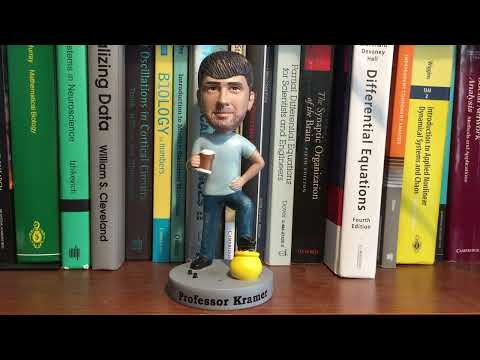

In [16]:
YouTubeVideo('XvIz0kPdZoE')

<div class="alert alert-block alert-danger">
Our results so far were not encouraging.

</p>

We're found a significant, positive relationship between `swim_lessons` and `drownings`

(i.e., with *more* swim lessons there are *more* drownings).

How can this be?
</div>

By performing **model checks**, we found patterns in the model errors (i.e., in the `residuals`).

In particular, we noticed a spatial pattern in the residuals:
- positive residuals near the coast,
- negative resiudals away from the coast.

This pattern in the residuals suggests our model is missing an important factor.

<div class="alert alert-block alert-success">

**Q:** What is missing from the model?

**A:**

- *Many things could be missing, including the age of individuals in the community, the time of year in which the data were collected, issues with the sampling of data. The goal of a model is not to capture every possible cause. Instead, the goal of the model is to develop a simple, but useful, description of the model. In the words of [George Box](https://en.wikipedia.org/wiki/All_models_are_wrong): "All models are wrong, but some are useful."*
- *We showed in the previous Minis another peice of information: the geographic location of each community. How might this impact the number of drownings?*

</div>

The pattern in the residuls suggests we model `drownings` with two predictors

1. The number of swim lessons (`swim_lessons`), and
2. The distance from the ocean (`distance_from_ocean`, measured as the geodesic distance in kilometers as the crow flies from Myrtle Beach).

To do so, let's fit a "2-dimensional line" (i.e., a plane) to the data.

In [17]:
# Load the additional variable,
distance_from_ocean = load_more_data()

In [18]:
create_dropdown_estimate_regression_3(swim_lessons, drownings, distance_from_ocean)

Dropdown(description='Options:', options=('I want to write all the code myself.', 'Show me the code and I will…

Output()

Let's interpret these numbers:

#### First Slope estimate = -0.0602

**Meaning:** The slope estimate represents the change in the number of `drownings` for a one-unit change in the `distance_from_ocean`.

**Interpretation:** For every one-unit increase in the `distance_from_ocean`, the number of `drownings` is estimated to **decrease** by 0.0602, on average.

#### First p-value = 4.2e-09

**Meaning:** The p-value is used to test the null hypothesis that the slope of the regression line is zero (no relationship between `distance_from_ocean` and the number of `drownings`).

**Interpretation:** The p-value describes the probability of seeing an effect at least this large if the `distance_from_ocean` had no relation to the number of `drownings` . A p-value of 2.7e-11 is much smaller than commonly used thresholds to significance levels (e.g., 0.05). This means that there is enough evidence to reject the null hypothesis. In other words, the data provide sufficient evidence to conclude that there *is* a statistically significant relationship between the `distance_from_ocean` and the number of `drownings`.

---

#### Second Slope estimate = -0.00033

**Meaning:** The slope estimate represents the change in the number of `drownings` for a one-unit change in the number of `swim_lessons`.

**Interpretation:** For every one-unit increase in the number of `swim_lessons`, the number of `drownings` is estimated to **decrease** by 0.00033, on average.

#### p-value = 0.314

**Meaning:** The p-value is used to test the null hypothesis that the slope of the regression line is zero (no relationship between the number of `swim_lessons` and the number of `drownings`).

**Interpretation:** The p-value describes the probability of seeing an effect at least this large if the number of `swim_lessons` had no relation to the number of `drownings` . A p-value of 0.314 is larger than commonly used thresholds to significance levels (e.g., 0.05). This means that there is not enough evidence to reject the null hypothesis. In other words, the data do not provide sufficient evidence to conclude that there is a statistically significant relationship between the number of `swim_lessons` and the number of `drownings`.


<div class="alert alert-block alert-success">

**Q:** Summarize the results of this statistical inference ... what do these 4 values tell us? Do these results make intutive sense?

**A:**

- *We have two results to interpret.*
- *First, we find a significant negative relationship between `drownings` and `distance_from_ocean`. In other words, the further from the ocean, the lower the number of drownings. That makes intuitive sense.*
- *Second, we find a weak (not significant) negative relationship between the `drownings` and the number of `swim_lessons`. While not significant, this negative relationship is consistent with our expectations: the more swim lessons, the fewer drownings.*

</div>

We can visualize our model, which is now the 2-dimensional plane:


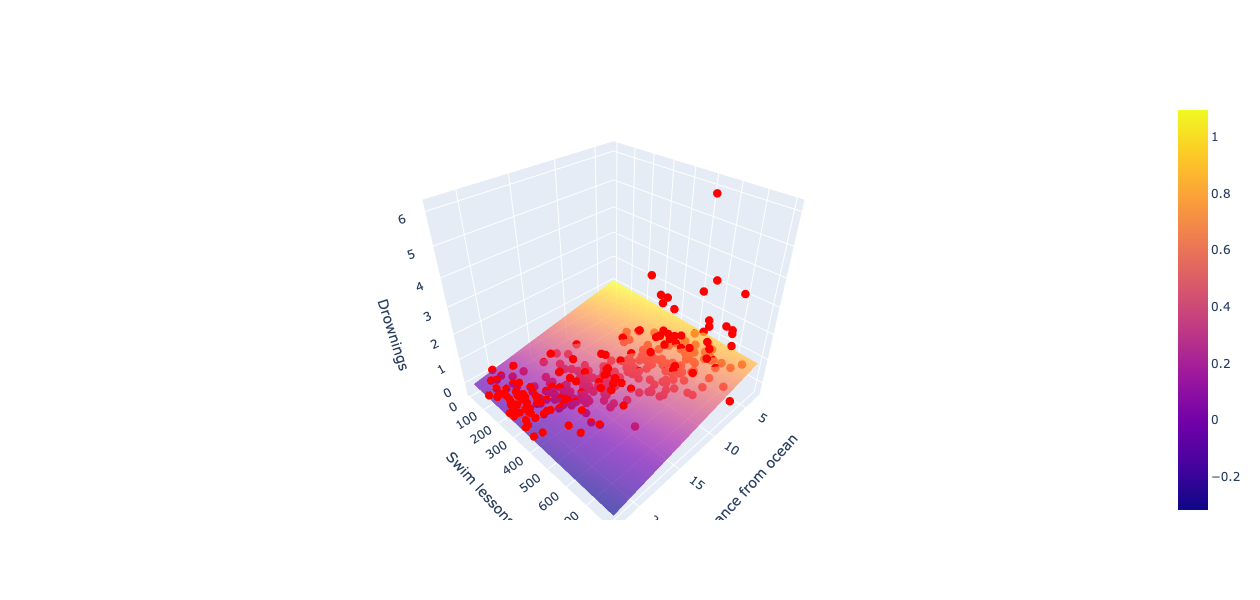

In [19]:
plot_regression_results_3d(swim_lessons, drownings, distance_from_ocean)

<div class="alert alert-block alert-success">

**Q:** Examine the model fit ... you'll probably need to rotate the plot. What do you see?

**A:**

- *The model fit is a 2-dimeonsional plane that slices through the data.*
- *The model fit is tilted so that, as the number of swim lessons or distance from ocean increaes, the number of drownings decreases.*
- *The model fit is not perfect. All of the points do not lie on the plane. But we never expect our model to be perfect. Instead, we're searching for a relatively simple model that's informative and a captures some aspects of the data.*

</div>

Let's **model check** the new model.

To do so, let's plot the new model errors (i.e., the `residuals`) versus a predictor in our model (here, the number of `swim_lessons`).

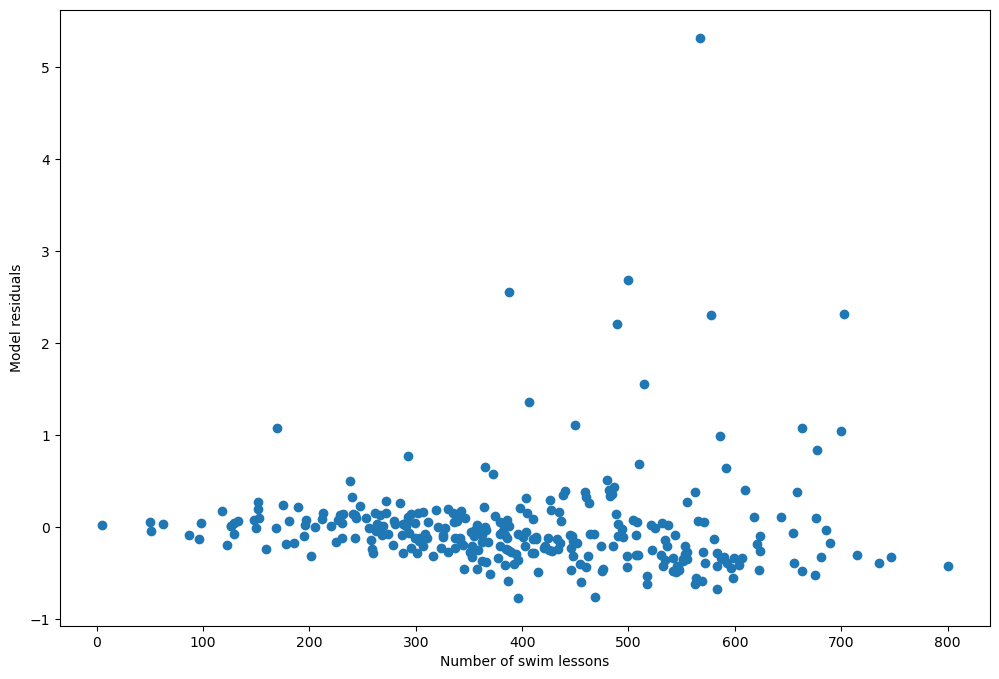

In [20]:
residuals = compute_residuals_3d(swim_lessons, drownings, distance_from_ocean)
plt.figure(figsize=(12, 8))
plt.scatter(swim_lessons, residuals)
plt.xlabel('Number of swim lessons')
plt.ylabel('Model residuals');

<div class="alert alert-block alert-success">

**Q:** Wait, I thought this was a 2-dimensional model. Why are the residuals only 1-dimensional?

**A:**

- *The residuals are the difference between the observed number of drownings (`drowning`) and the predicted number of drowning by the model. Both of these quantities are 1-dimensional. It's the input to the model (i.e., the number of model predictors) `swim_lessons` and `distance_from_ocean` that is 2-dimensional.*
    
</div>

<div class="alert alert-block alert-success">

**Q:** Do the residuals look less patterned (compared to our original line fit)? Do you still see any patterns?

**A:**

*In this new model, our inspection of `residuals` versus `swim_lessons` reveals*

- *as `swim_lessons` increases, *no* systematic trend in the `residuals`,*
- *as `swim_lessons` increases, the variability of the `residuals` tends to increase.*

*This is a nice improvement compared to our original model. Including the additional variable has reduced a systematic trend in the residuals*.    
</div>

Let's also plot the `residuals` of the new model versus the geographic location.

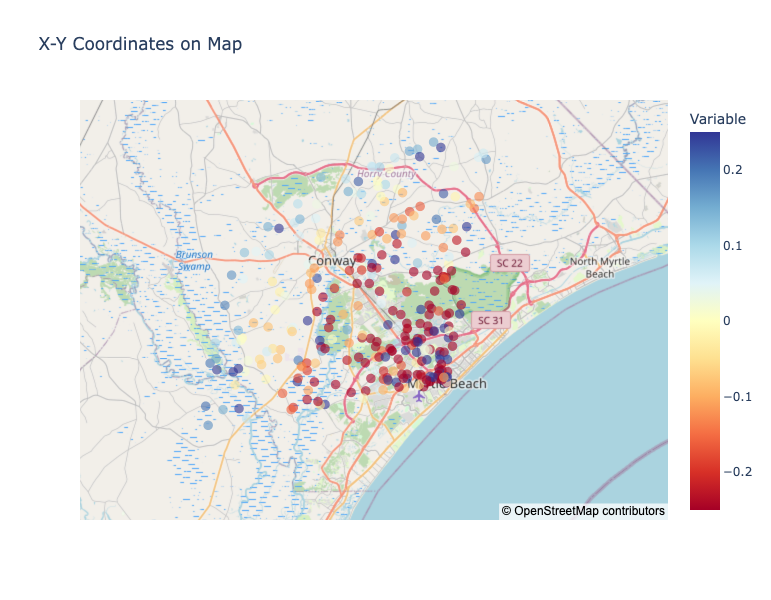

In [21]:
plot_spatial_coordinates(xy, residuals.to_numpy())

<div class="alert alert-block alert-success">

**Q:** Do the residuals look patternless? Do you see any patterns in the residuals that depend on location?

**A:**

- The residuals appear to vary less with geographic location.
- Notice we now observe positive residuals (darker blue colors) both near the ocean and far from the ocean. This is a good improvement compared to our original model.
    
</div>

We've now made progress improving our model! Our initial model produced a significant - but nonsensical - result: as swim lessons increase, so do the number of drownings. Performing our model checks, we found residual analysis revealed a poor model fit.

We improved our model by adding another predictor - the distance to the ocean. Doing so changed our results dramatically: we now find a (weak) relationship between increasing swim lessons and decreasing drownings. However, our evidence for this relationship is not convincing (the p-value is large). We'll show in other units that continued model refinement can further strengthen this result. If you're interested, check out the other Minis associated with this Unit.

To conclude, we made inferences from noisy data by buidling a model. But estimating the model and interperting the results is not enough! We must also check our model; we did so here using two graphicall method plotting the data and model, and plotting the residuals. 